In [0]:
# Multi class classification

In [2]:
!wget -O training-set.csv https://intrusiondetectionproject.s3.ap-south-1.amazonaws.com/UNSW_NB15_training-set.csv
!wget -O testing-set.csv https://intrusiondetectionproject.s3.ap-south-1.amazonaws.com/UNSW_NB15_testing-set.csv

--2019-10-30 16:55:26--  https://intrusiondetectionproject.s3.ap-south-1.amazonaws.com/UNSW_NB15_training-set.csv
Resolving intrusiondetectionproject.s3.ap-south-1.amazonaws.com (intrusiondetectionproject.s3.ap-south-1.amazonaws.com)... 52.219.62.46
Connecting to intrusiondetectionproject.s3.ap-south-1.amazonaws.com (intrusiondetectionproject.s3.ap-south-1.amazonaws.com)|52.219.62.46|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 15380800 (15M) [text/csv]
Saving to: ‘training-set.csv’

training-set.csv    100%[===================>]  14.67M  5.37MB/s    in 2.7s    

2019-10-30 16:55:35 (5.37 MB/s) - ‘training-set.csv’ saved [15380800/15380800]

--2019-10-30 16:55:37--  https://intrusiondetectionproject.s3.ap-south-1.amazonaws.com/UNSW_NB15_testing-set.csv
Resolving intrusiondetectionproject.s3.ap-south-1.amazonaws.com (intrusiondetectionproject.s3.ap-south-1.amazonaws.com)... 52.219.64.99
Connecting to intrusiondetectionproject.s3.ap-south-1.amazonaws.com (int

In [0]:
import pandas as pd

In [0]:
train=pd.read_csv("training-set.csv")
test=pd.read_csv("testing-set.csv")

In [5]:
train.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,254,0,180363632.0,0.0,0,0,0.011,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,254,0,881000000.0,0.0,0,0,0.008,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,254,0,854400000.0,0.0,0,0,0.005,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,254,0,600000000.0,0.0,0,0,0.006,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.0025,254,0,850400000.0,0.0,0,0,0.010,0.0,0.0,0.0,0,0,0,0,0.0,0.0,0.0,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0


In [6]:
train.attack_cat.unique()

array(['Normal', 'Reconnaissance', 'Backdoor', 'DoS', 'Exploits',
       'Analysis', 'Fuzzers', 'Worms', 'Shellcode', 'Generic'],
      dtype=object)

In [0]:
#creating a new column with this attack category

def f(row):
    if row['attack_cat']=="Normal":
        val = 0
    elif row['attack_cat']=="Reconnaissance":
        val = 1
    elif row['attack_cat']=="Backdoor":
        val = 2
    elif row['attack_cat']=="DoS":
        val = 3
    elif row['attack_cat']=="Exploits":
        val = 4
    elif row['attack_cat']=="Analysis":
        val = 5
    elif row['attack_cat']=="Fuzzers":
        val = 6
    elif row['attack_cat']=="Worms":
        val = 7
    elif row['attack_cat']=="Shellcode":
        val = 8            
    else:
        val = 9
    return val

In [0]:
train['attack_label'] = train.apply(f, axis=1)

In [9]:
train

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label,attack_label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,254,0,1.803636e+08,0.000000,0,0,0.011000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,248,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,254,0,8.810000e+08,0.000000,0,0,0.008000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,881,0,0,0,2,2,1,1,1,2,0,0,0,1,2,0,Normal,0,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,254,0,8.544000e+08,0.000000,0,0,0.005000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,534,0,0,0,3,2,1,1,1,3,0,0,0,1,3,0,Normal,0,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,254,0,6.000000e+08,0.000000,0,0,0.006000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,450,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,254,0,8.504000e+08,0.000000,0,0,0.010000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,1063,0,0,0,3,2,2,2,1,3,0,0,0,2,3,0,Normal,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,254,0,8.320000e+07,0.000000,0,0,0.005000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,52,0,0,0,1,2,2,1,1,2,0,0,0,2,1,0,Normal,0,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,254,252,1.241044e+05,2242.109863,7,1,55.880051,143.7,4798.130981,190.980813,255,1072535109,3284291478,255,0.173208,0.100191,0.073017,903,44,0,0,1,1,2,1,1,1,0,0,0,3,2,0,Normal,0,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.720000,0.0,0.000000,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,Normal,0,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,0,0,0.000000e+00,0.000000,0,0,60000.732000,0.0,10.954518,0.000000,0,0,0,0,0.000000,0.000000,0.000000,46,0,0,0,1,2,1,1,1,1,0,0,0,1,1,1,Normal,0,0


In [10]:
# Import label encoder 
#Converting String features to int 64

from sklearn import preprocessing 
  
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'proto' 
train['proto']= label_encoder.fit_transform(train['proto']) 
  
train['proto'].unique() 


train['service']= label_encoder.fit_transform(train['service']) 
  
train['service'].unique() 

train['state']= label_encoder.fit_transform(train['state']) 
  
train['state'].unique() 

train['attack_cat']= label_encoder.fit_transform(train['attack_cat']) 
  
train['attack_cat'].unique() 

array([6, 7, 1, 2, 3, 0, 4, 9, 8, 5])

In [11]:
#Apply feature scaling to normalize the dataset

from sklearn.preprocessing import MinMaxScaler


df = train
df.drop('attack_label', axis=1)
cols = df.columns


scaler = MinMaxScaler(feature_range=(0,1))

scaledTrain = scaler.fit_transform(df)

scaledTrain = pd.DataFrame(scaledTrain, columns = cols)

scaledTrain.head()

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,dload,sloss,dloss,sinpkt,dinpkt,sjit,djit,swin,stcpb,dtcpb,dwin,tcprtt,synack,ackdat,smean,dmean,trans_depth,response_body_len,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label,attack_label
0,0.000000,1.833334e-07,0.9,0.0,0.666667,0.000094,0.0,0.000033,0.0,0.090909,0.996078,0.0,0.034238,0.0,0.0,0.0,1.833028e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.151351,0.0,0.0,0.0,0.016129,0.333333,0.000000,0.000000,0.0,0.016129,0.0,0.0,0.0,0.000000,0.016393,0.0,0.666667,0.0,0.0
1,0.000012,1.333334e-07,0.9,0.0,0.666667,0.000094,0.0,0.000121,0.0,0.125000,0.996078,0.0,0.167236,0.0,0.0,0.0,1.333111e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.579054,0.0,0.0,0.0,0.016129,0.333333,0.000000,0.000000,0.0,0.016129,0.0,0.0,0.0,0.000000,0.016393,0.0,0.666667,0.0,0.0
2,0.000024,8.333335e-08,0.9,0.0,0.666667,0.000094,0.0,0.000073,0.0,0.200000,0.996078,0.0,0.162187,0.0,0.0,0.0,8.331946e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.344595,0.0,0.0,0.0,0.032258,0.333333,0.000000,0.000000,0.0,0.032258,0.0,0.0,0.0,0.000000,0.032787,0.0,0.666667,0.0,0.0
3,0.000036,1.000000e-07,0.9,0.0,0.666667,0.000094,0.0,0.000061,0.0,0.166667,0.996078,0.0,0.113895,0.0,0.0,0.0,9.998335e-08,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.287838,0.0,0.0,0.0,0.032258,0.333333,0.017241,0.017241,0.0,0.032258,0.0,0.0,0.0,0.016949,0.032787,0.0,0.666667,0.0,0.0
4,0.000049,1.666667e-07,0.9,0.0,0.666667,0.000094,0.0,0.000146,0.0,0.100000,0.996078,0.0,0.161427,0.0,0.0,0.0,1.666389e-07,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.702027,0.0,0.0,0.0,0.032258,0.333333,0.017241,0.017241,0.0,0.032258,0.0,0.0,0.0,0.016949,0.032787,0.0,0.666667,0.0,0.0


In [12]:
#apply SelectKBest class to extract top 10 best features
from sklearn.feature_selection import SelectKBest, chi2

X = scaledTrain.iloc[:,0:44]  #independent columns
y = train['attack_label']


bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

               Specs         Score
35  ct_dst_sport_ltm  15113.154773
20              swin  14326.018280
23              dwin  13464.888066
34  ct_src_dport_ltm  11708.309104
36    ct_dst_src_ltm  11171.837996
11              dttl  10966.652306
41        ct_srv_dst   9778.451441
31        ct_srv_src   8785.891069
33        ct_dst_ltm   8484.036759
21             stcpb   6749.117721


In [13]:
#create a df with the selected important features
from sklearn.externals import joblib 

rawTrain = train[['swin', 'dwin', 'sttl', 'ct_dst_sport_ltm', 'ct_src_dport_ltm', 'dload', 'dtcpb', 'stcpb', 'rate', 'ct_dst_src_ltm']].copy()
newScaler = MinMaxScaler(feature_range=(0,1))
rawScaledTrain = scaler.fit(rawTrain)

joblib.dump(rawScaledTrain, 'scaler_model_multi.pkl')

newTrain = scaledTrain[['swin', 'dwin', 'dttl', 'ct_dst_src_ltm', 'ct_src_dport_ltm', 'stcpb', 'ct_srv_dst', 'ct_srv_src', 'ct_dst_ltm', 'ct_dst_sport_ltm']].copy()
newTrain.head(20)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


,swin,dwin,dttl,ct_dst_src_ltm,ct_src_dport_ltm,stcpb,ct_srv_dst,ct_srv_src,ct_dst_ltm,ct_dst_sport_ltm
0,0.0,0.0,0.0,0.016129,0.000000,0.0,0.016393,0.016129,0.000000,0.000000
1,0.0,0.0,0.0,0.016129,0.000000,0.0,0.016393,0.016129,0.000000,0.000000
2,0.0,0.0,0.0,0.032258,0.000000,0.0,0.032787,0.032258,0.000000,0.000000
3,0.0,0.0,0.0,0.032258,0.017241,0.0,0.032787,0.032258,0.017241,0.000000
4,0.0,0.0,0.0,0.032258,0.017241,0.0,0.032787,0.032258,0.017241,0.000000
5,0.0,0.0,0.0,0.016129,0.017241,0.0,0.016393,0.016129,0.017241,0.000000
6,0.0,0.0,0.0,0.016129,0.017241,0.0,0.016393,0.016129,0.017241,0.000000
7,0.0,0.0,0.0,0.032258,0.000000,0.0,0.032787,0.032258,0.000000,0.000000
8,0.0,0.0,0.0,0.016129,0.017241,0.0,0.016393,0.016129,0.017241,0.027027
9,0.0,0.0,0.0,0.016129,0.017241,0.0,0.016393,0.016129,0.017241,0.027027


In [14]:
X=newTrain
X.head()

,swin,dwin,dttl,ct_dst_src_ltm,ct_src_dport_ltm,stcpb,ct_srv_dst,ct_srv_src,ct_dst_ltm,ct_dst_sport_ltm
0,0.0,0.0,0.0,0.016129,0.000000,0.0,0.016393,0.016129,0.000000,0.0
1,0.0,0.0,0.0,0.016129,0.000000,0.0,0.016393,0.016129,0.000000,0.0
2,0.0,0.0,0.0,0.032258,0.000000,0.0,0.032787,0.032258,0.000000,0.0
3,0.0,0.0,0.0,0.032258,0.017241,0.0,0.032787,0.032258,0.017241,0.0
4,0.0,0.0,0.0,0.032258,0.017241,0.0,0.032787,0.032258,0.017241,0.0


In [0]:
y=train['attack_label']

Now, we apply Machine Learning Algorithms:

K Nearest Neighbor(KNN)

Support Vector Machine


Random Forest

KNN

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (65865, 10) (65865,)
Test set: (16467, 10) (16467,)


In [17]:
# when we set k=3

from sklearn.neighbors import KNeighborsClassifier
k = 3

knn = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
knn
 
pred =knn.predict(X_test)

from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, knn.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, pred))

Train set Accuracy:  0.8105063387231458
Test set Accuracy:  0.7540535616687921


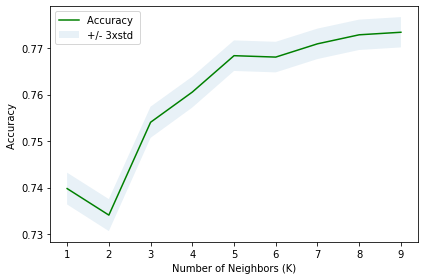

Best accuracy: 0.773425639157102 k= 9


In [18]:
# Finding the best value of k

import numpy as np
import matplotlib.pyplot as plt

Ks = 10


mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

ConfustionMx = [];

for n in range(1,Ks):
    
    
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    pred=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, pred)

    
    std_acc[n-1]=np.std(pred==y_test)/np.sqrt(pred.shape[0])

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()
print( "Best accuracy:", mean_acc.max(), "k=", mean_acc.argmax()+1)

We get best accuracy for KNN , when k is 9, with a accuracy of 70%.

In [19]:
#Report

# Importing the classification report and confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

print(confusion_matrix(y_test,pred))

[[6702  230    0   92  333    0   65    0    2   15]
 [  71  244    0   45  261    0   39    0    2    0]
 [   2    4    9   19   44    1   22    0    0   25]
 [  61   68   22  316  333    1   25    0    2   29]
 [ 313  147   24  294 1296    1   95    0    3   42]
 [   0    2   16   38   46    0   29    0    0   30]
 [ 222   30   22   67  163    0  641    0    0   47]
 [   2    1    0    0    6    0    0    0    0    0]
 [   6   29    0    0   25    0    6    0    0    0]
 [  30   30    1   15  109    0   27    0    0 3528]]


In [20]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90      7439
           1       0.31      0.37      0.34       662
           2       0.10      0.07      0.08       126
           3       0.36      0.37      0.36       857
           4       0.50      0.59      0.54      2215
           5       0.00      0.00      0.00       161
           6       0.68      0.54      0.60      1192
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00        66
           9       0.95      0.94      0.95      3740

    accuracy                           0.77     16467
   macro avg       0.38      0.38      0.38     16467
weighted avg       0.77      0.77      0.77     16467



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [0]:
#serialize the model 

import pickle
pickle.dump(neigh, open("knnmodel.pkl", "wb"))

SVM

In [0]:
from sklearn.svm import SVC
model=SVC()

In [23]:
model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [0]:
pred=model.predict(X_test)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix

In [26]:
print(confusion_matrix(y_test,pred))

[[7409    0    0    0    0    0    1    0    0   29]
 [ 645    0    0    0    0    0    0    0    0   17]
 [  26    0    0    0    0    0    0    0    0  100]
 [ 582    0    0    0    1    0    0    0    0  274]
 [1895    0    0    0    1    0    3    0    0  316]
 [  54    0    0    0    0    0    0    0    0  107]
 [ 920    0    0    0    0    0   50    0    0  222]
 [   9    0    0    0    0    0    0    0    0    0]
 [  66    0    0    0    0    0    0    0    0    0]
 [ 235    0    0    0    0    0    0    0    0 3505]]


In [27]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.63      1.00      0.77      7439
           1       0.00      0.00      0.00       662
           2       0.00      0.00      0.00       126
           3       0.00      0.00      0.00       857
           4       0.50      0.00      0.00      2215
           5       0.00      0.00      0.00       161
           6       0.93      0.04      0.08      1192
           7       0.00      0.00      0.00         9
           8       0.00      0.00      0.00        66
           9       0.77      0.94      0.84      3740

    accuracy                           0.67     16467
   macro avg       0.28      0.20      0.17     16467
weighted avg       0.59      0.67      0.54     16467



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Random Forest

In [28]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train,y_train)
# predictions
rfc_predict = rfc.predict(X_test)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Using Grid Search in Random Forest

In [0]:
#from sklearn.model_selection import RandomizedSearchCV

# number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 300, num = 10)]

# number of features at every split
#max_features = ['auto']

# max depth
#max_depth = [int(x) for x in np.linspace(100, 200, num = 11)]
#max_depth.append(None)

# create random grid
#random_grid = {
 #'n_estimators': n_estimators,
 #'max_features': max_features,
 #'max_depth': max_depth
 #}
# Random search of parameters
#rfc_random = RandomizedSearchCV(estimator = rfc, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=42, n_jobs =20)
# Fit the model
#rfc_random.fit(X_train, y_train)
# print results
#print(rfc_random.best_params_)

In [30]:
print("=== Confusion Matrix ===")
print(confusion_matrix(y_test, rfc_predict))
print('\n')
print("=== Classification Report ===")
print(classification_report(y_test, rfc_predict))
print('\n')

=== Confusion Matrix ===
[[6855  101    2   79  261    0  101    0   10   30]
 [ 210  156    0   63  176    0   37    1    6   13]
 [  11    0    1    7   36    0   42    0    0   29]
 [ 114   40    1  392  230    0   41    0    2   37]
 [ 346  165    7  423 1001    0  164    2   13   94]
 [   5    0    0   34   43    3   44    0    0   32]
 [ 181   45    1   59  146    5  695    0    1   59]
 [   1    1    0    2    4    0    0    0    1    0]
 [  11   26    0    2   20    0    6    0    0    1]
 [  39   23    0   20   72    0   35    2    0 3549]]


=== Classification Report ===
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7439
           1       0.28      0.24      0.26       662
           2       0.08      0.01      0.01       126
           3       0.36      0.46      0.40       857
           4       0.50      0.45      0.48      2215
           5       0.38      0.02      0.04       161
           6       0.60      0.58

In [0]:
#serialize the model

pickle.dump(rfc, open("randforestmodel.pkl", "wb"))

In [48]:
tmp = y.tolist()
for i in range(len(tmp)//300):
  if(tmp[i] == 3.0):
    print(i)

246


In [44]:
X.loc[[245]]

,swin,dwin,dttl,ct_dst_src_ltm,ct_src_dport_ltm,stcpb,ct_srv_dst,ct_srv_src,ct_dst_ltm,ct_dst_sport_ltm
245,0.0,0.0,0.0,0.016129,0.0,0.0,0.0,0.0,0.0,0.0


In [53]:
y.loc[292]

6

In [54]:
train.iloc[292, [35, 20, 23, 34, 36, 11, 41, 31, 33, 21]]

ct_dst_sport_ltm            1.0
swin                      255.0
dwin                      255.0
ct_src_dport_ltm            2.0
ct_dst_src_ltm              7.0
dttl                      252.0
ct_srv_dst                  7.0
ct_srv_src                  7.0
ct_dst_ltm                  2.0
stcpb               949471373.0
Name: 292, dtype: float64